Porto Seguro's Safe Driver Prediction
====

## Introduction
[This competition](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data) is hosted by the third largest insurance company in Brazil: Porto Seguro with the task of predicting the probability that a driver will initiate an insurance claim in the next year.

In the train data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. **Values of -1 indicate that the feature was missing** from the observation. The target columns signifies whether or not a claim was filed for that policy holder

train.csv contains the training data, where each row corresponds to a policy holder, and the target columns signifies that a claim was filed.


In [1]:
# Import libraries
# Your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [47]:
# Read csv file and take a look at it
train = pd.read_csv('./train.csv')
train.head()
# Your code here
for col in train.columns: 
    print(col) 

id
target
ps_ind_01
ps_ind_02_cat
ps_ind_03
ps_ind_04_cat
ps_ind_05_cat
ps_ind_06_bin
ps_ind_07_bin
ps_ind_08_bin
ps_ind_09_bin
ps_ind_10_bin
ps_ind_11_bin
ps_ind_12_bin
ps_ind_13_bin
ps_ind_14
ps_ind_15
ps_ind_16_bin
ps_ind_17_bin
ps_ind_18_bin
ps_reg_01
ps_reg_02
ps_reg_03
ps_car_01_cat
ps_car_02_cat
ps_car_03_cat
ps_car_04_cat
ps_car_05_cat
ps_car_06_cat
ps_car_07_cat
ps_car_08_cat
ps_car_09_cat
ps_car_10_cat
ps_car_11_cat
ps_car_11
ps_car_12
ps_car_13
ps_car_14
ps_car_15
ps_calc_01
ps_calc_02
ps_calc_03
ps_calc_04
ps_calc_05
ps_calc_06
ps_calc_07
ps_calc_08
ps_calc_09
ps_calc_10
ps_calc_11
ps_calc_12
ps_calc_13
ps_calc_14
ps_calc_15_bin
ps_calc_16_bin
ps_calc_17_bin
ps_calc_18_bin
ps_calc_19_bin
ps_calc_20_bin


In [48]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [49]:
# Taking a look at how many rows and columns the train dataset contains
rows = len(train.index) # Your code here
columns = len(train.columns) # Your code here
print("The train dataset contains {} rows and {} columns".format(rows, columns))

The train dataset contains 595212 rows and 59 columns


## 1. Data Quality Checks

### Null or missing values check
Let check whether there are any null values in the train dataset as follows:

In [50]:
# Your code here
train.isnull().values.any()

False

**Note:** Our null values check returns False but however, this does not really mean that this case has been closed as the data is also described as *"Values of -1 indicate that the feature was missing from the observation"*. Therefore I take it that Porto Seguro has simply conducted a blanket replacement of all null values in the data with the value of -1. Let us now inspect if there where any missing values in the data.

Here we can see that which columns contained -1 in their values so we could easily for example make a blanket replacement of all -1 with nulls first as follows:

In [51]:
train_copy = train.copy()
train_copy = train_copy.replace(-1, np.NaN)

We can use "Missingno" to visualize missing values in the dataset.

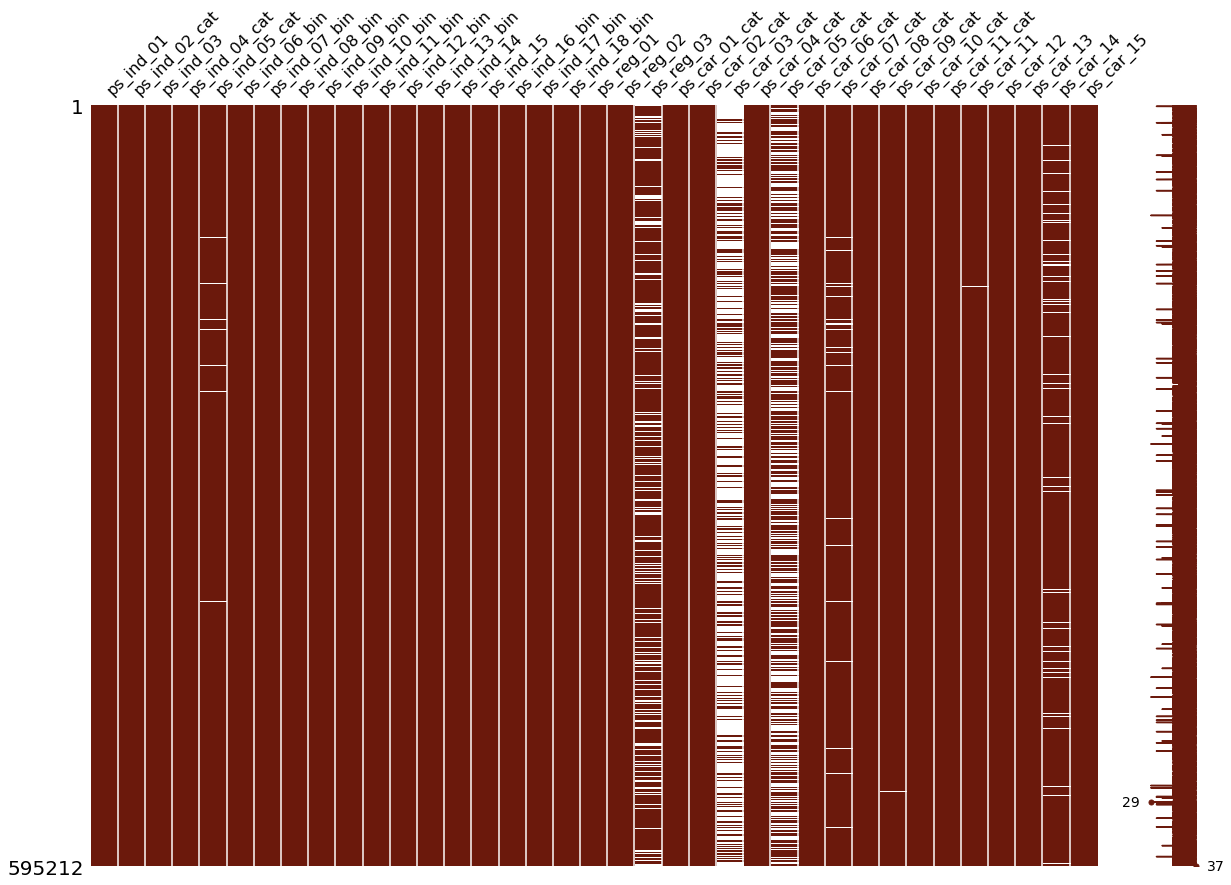

In [84]:
# If you don't have "Missingno" package, use this command to install
# (Linux) conda install -c conda-forge missingno
!pip install missingno
import missingno as msno
msno.matrix(df=train_copy.iloc[:, 2:39], figsize=(20, 14), color=(0.42, 0.1, 0.05))

In [53]:
# List null columns name
# Hint: isnull()
# Your code here
for column in train:
    if train[column].isnull().any():
       print('{0} has {1} null values'.format(column, train[column].isnull().sum()))

#### Target variable inspection

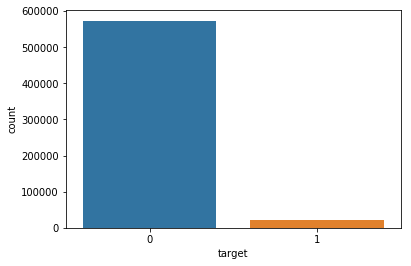

In [63]:
# Using countplot to represent target
# Your code here
sns.countplot(x="target", data=train)


## 2. Feature inspection and filtering

### Correlation plots
As a starter, let us generate some linear correlation plots just to have a quick look at how a feature is linearly correlated to the next and perhaps start gaining some insights from here. At this juncture, I will use the seaborn statistical visualisation package to plot a heatmap of the correlation values. Conveniently, Pandas dataframes come with the corr() method inbuilt, which calculates the Pearson correlation. Also as convenient is Seaborn's way of invoking a correlation plot. Just literally the word "heatmap"

#### Correlation of float features

In [55]:
train_float = train.select_dtypes(include=['float64'])
train_int = train.select_dtypes(include=['int64'])

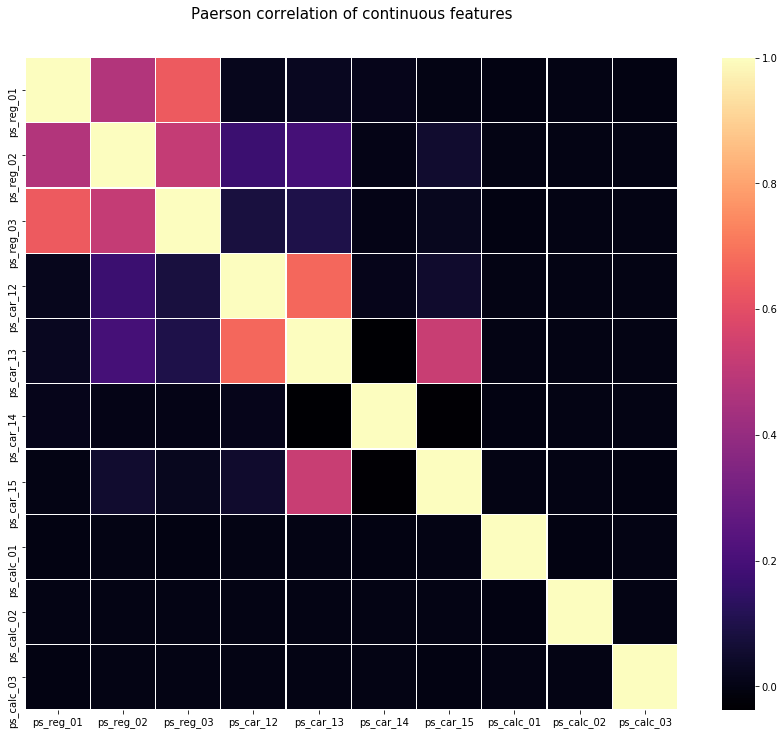

In [56]:
colormap = plt.cm.magma
plt.figure(figsize=(16, 12))
plt.title("Paerson correlation of continuous features", y=1.05, size=15)
sns.heatmap(train_float.corr(), linewidths=0.1, vmax=1.0, square=True,
           cmap=colormap)
plt.show()

From the correlation plot, we can see that the majority of the features display zero or no correlation to one another. This is quite an interesting observation that will warrant our further investigation later down. For now, the paired features that display a positive linear correlation are listed as follows:

(ps_reg_01, ps_reg_03)

(ps_reg_02, ps_reg_03)

(ps_car_12, ps_car_13)

(ps_car_13, ps_car_15)

### Correlation of integer features

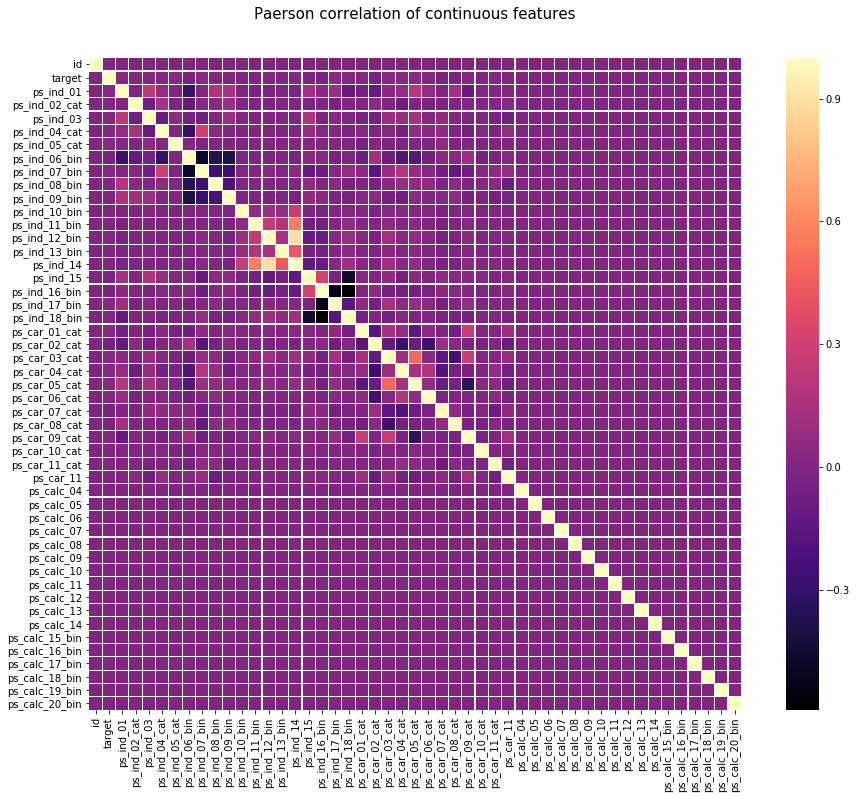

In [57]:
# Your code here
# Hint: correlation of train_int
colormap = plt.cm.magma
plt.figure(figsize=(16, 12))
plt.title("Paerson correlation of continuous features", y=1.05, size=15)
sns.heatmap(train_int.corr(), linewidths=0.1, vmax=1.0, square=True,
           cmap=colormap)
plt.show()

#### Which features have negatively correlation?
Negatively correlated features : **Your answer here**

### Binary features inspection
Another aspect of the data that we may want to inspect would be the coulmns that only contain binary valeus, i.e where values take on only either of the two values 1 or 0. Proceeding, we store all columns that contain these binary values and then generate a vertical plotly bar plot of these binary values as follows:

In [58]:
bin_col = list(filter(lambda x: '_bin' in x, train.columns))
bin_value_counts = train[bin_col].apply(pd.value_counts)

In [59]:
bin_value_counts

,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,360852,442223,497644,484917,594990,594205,589594,594648,201882,523143,503879,522342,221514,265356,424278,387469,503955
1,234360,152989,97568,110295,222,1007,5618,564,393330,72069,91333,72870,373698,329856,170934,207743,91257


<BarContainer object of 1 artists>

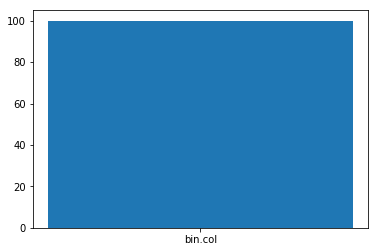

In [60]:
# hint pandas plot.bar with stacked=True
# Your code her
plt.bar(x='bin.col',height = 100,data = train)

Those columns ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin which are completely dominated by zeros. They do not contain much information.

## 3. Preprocess Data

In [39]:
# Import train_test_split 
# Your code here
from sklearn.model_selection import train_test_split


In [66]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [67]:
# Define X (features), y (target)
X = train.drop(columns=['target','id']) 


In [70]:
y=train['target'] 

In [71]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

#### Randomly Under-Sampling the Training Dataset¶
**Note:** Validate ratio between 2 class after Under-Sampling

In [72]:
# Your code here
training_data = pd.concat ([X_train,y_train],axis = 1)
training_data['target'].value_counts()

0    430158
1     16251
Name: target, dtype: int64

In [75]:
percentage_claim = sum(train['target']==1)/len(train['target'])*100 
percentage_no_claim = sum(train['target']==0)/len(train['target'])*100
print ('Percentage original claim: ', percentage_claim)
print ('Percentage original no-claim: ', percentage_no_claim)

Percentage original claim:  3.6447517859182947
Percentage original no-claim:  96.3552482140817


#### Randomly Over-Sampling the Training Dataset
**Note:** Validate ratio between 2 class after Over-Sampling

In [76]:
# Your code here

number_of_instances = 100000

number_sub_claim = int (percentage_claim/100 * number_of_instances)
number_sub_non_claim = int (percentage_no_claim/100 * number_of_instances)

sub_claim_data = training_data[training_data['target'] == 1].head(number_sub_claim)
sub_non_claim_data = training_data[training_data['target'] == 0].head(number_sub_non_claim)

print ('Number of newly sub claim data:',len(sub_claim_data))
print ('Number of newly sub non-claim data:',len(sub_non_claim_data))

sub_training_data = pd.concat ([sub_claim_data, sub_non_claim_data], axis = 0)
sub_training_data['target'].value_counts()

Number of newly sub claim data: 3644
Number of newly sub non-claim data: 96355


0    96355
1     3644
Name: target, dtype: int64

Percentage of normal drivers:  0.5
Percentage of claim drivers:  0.5
Total number of drivers in resampled data:  192710


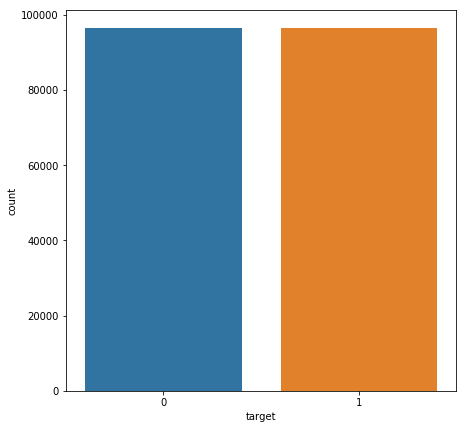

In [77]:
claim_data = sub_training_data[sub_training_data['target']==1] # Your code here

non_claim_data = sub_training_data[sub_training_data['target']==0] # Your code here

number_records_claim = claim_data.shape[0] # Your code here
number_records_non_claim = non_claim_data.shape[0] # Your code here

over_sample_claim = claim_data.sample(replace=True, n=number_records_non_claim)# Your code here

over_sample_data = pd.concat([over_sample_claim, non_claim_data])# Your code here

# Showing ratio
print("Percentage of normal drivers: ", non_claim_data.shape[0]/over_sample_data.shape[0])
print("Percentage of claim drivers: ", over_sample_claim.shape[0]/over_sample_data.shape[0])
print("Total number of drivers in resampled data: ", over_sample_data.shape[0])

# Assigning X, y for over-sampled dataset
X_train_oversample = over_sample_data.drop(columns = 'target')
y_train_oversample =  over_sample_data['target'] # Your code here

# Plot countplot
plt.figure(figsize=(7,7))
# Make a count plot to show ratio between 2 class on "target" column
# Your code here
sns.countplot(over_sample_data['target'])
plt.show()

## 4. Modeling

In [78]:
# Spot check with LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

lr = LogisticRegression() # Your code here: create logistic regression model
dtc = DecisionTreeClassifier() # Your code here: create decision tree model
rfc = RandomForestClassifier() # Your code here: create random forest model
bnb = BernoulliNB() # Your code here: create BernoulliNB model
gnb = GaussianNB() # Your code here: create GaussianNB model


models = [lr, dtc, rfc, gnb, bnb]
models_name = ["Logistic Regression", "Decision Tree", "Random Forest", "Bernoulli NB", "Gaussian NB"]

In [88]:
dtc.fit(X_train, y_train)
rfc.fit(X_train,y_train)
lr.fit(X_train,y_train)
bnb.fit(X_train,y_train)
gnb.fit(X_train,y_train)

/Users/trangnguyen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GaussianNB(priors=None, var_smoothing=1e-09)

## 5. Evaluation Metrics

In [93]:
# Import confusion_matrix, classification_report
# Your code here

# We create an utils function, that take a trained model as argument and print out confusion matrix
# classification report base on X and y

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,dtc.predict(X_test)))
print(classification_report(y_test,lr.predict(X_test)))
print(classification_report(y_test,bnb.predict(X_test)))
print(classification_report(y_test,rfc.predict(X_test)))
print(classification_report(y_test,gnb.predict(X_test)))

# We create an utils function, that take a trained model as argument and print out confusion matrix
# classification report base on X and y


              precision    recall  f1-score   support

           0       0.96      0.95      0.96    143360
           1       0.04      0.06      0.05      5443

   micro avg       0.92      0.92      0.92    148803
   macro avg       0.50      0.51      0.50    148803
weighted avg       0.93      0.92      0.92    148803

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143360
           1       0.00      0.00      0.00      5443

   micro avg       0.96      0.96      0.96    148803
   macro avg       0.48      0.50      0.49    148803
weighted avg       0.93      0.96      0.95    148803



/Users/trangnguyen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/trangnguyen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/trangnguyen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143360
           1       0.31      0.00      0.00      5443

   micro avg       0.96      0.96      0.96    148803
   macro avg       0.64      0.50      0.49    148803
weighted avg       0.94      0.96      0.95    148803

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143360
           1       0.40      0.00      0.00      5443

   micro avg       0.96      0.96      0.96    148803
   macro avg       0.68      0.50      0.49    148803
weighted avg       0.94      0.96      0.95    148803

              precision    recall  f1-score   support

           0       0.97      0.93      0.95    143360
           1       0.07      0.14      0.09      5443

   micro avg       0.90      0.90      0.90    148803
   macro avg       0.52      0.53      0.52    148803
weighted avg       0.93      0.90      0.92    148803



In [91]:
dtc_predictions = dtc.predict(X_test)
accuracy_score(y_test, dtc_predictions)

0.9184559451086336

In [92]:
rfc_predictions = rfc.predict(X_test)
accuracy_score(y_test, rfc_predictions)

0.9634147161011539

In [94]:
lr_predictions = lr.predict(X_test)
accuracy_score(y_test, lr_predictions)

0.9634214363957716

In [95]:
bnb_predictions = bnb.predict(X_test)
accuracy_score(y_test, bnb_predictions)

0.9633206319765059

In [96]:
gnb_predictions = gnb.predict(X_test)
accuracy_score(y_test, gnb_predictions)

0.9019105797598167

In [101]:
def evaluate_model(estimator, X, y):
    # Note: We should test on the original test set
    predictions = estimator.predict(X)
    print('Confusion matrix:\n', confusion_matrix(y, predictions))
    print('Classification report:\n', classification_report(y, predictions))
    print('Testing set information:\n', y.value_counts())

    # Set print options
    np.set_printoptions(precision=2)

### Evaluate with Origin dataset

In [103]:
X_train_sub = sub_training_data.drop(columns='target')
y_train_sub = sub_training_data['target']

for idx, model in enumerate(models):
    print("Model: {}".format(models_name[idx]))
    # Your code here
    # Fit your model with Origin dataset
    model.fit(X_test,y_test)
    evaluate_model(model,X_test,y_test)

    # Evaluate model with X_test, y_test
    print("=======================================")

Model: Logistic Regression


/Users/trangnguyen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix:
 [[143360      0]
 [  5443      0]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    143360
           1       0.00      0.00      0.00      5443

   micro avg       0.96      0.96      0.96    148803
   macro avg       0.48      0.50      0.49    148803
weighted avg       0.93      0.96      0.95    148803

Testing set information:
 0    143360
1      5443
Name: target, dtype: int64
Model: Decision Tree


/Users/trangnguyen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/trangnguyen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/trangnguyen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix:
 [[143360      0]
 [     0   5443]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    143360
           1       1.00      1.00      1.00      5443

   micro avg       1.00      1.00      1.00    148803
   macro avg       1.00      1.00      1.00    148803
weighted avg       1.00      1.00      1.00    148803

Testing set information:
 0    143360
1      5443
Name: target, dtype: int64
Model: Random Forest
Confusion matrix:
 [[143360      0]
 [  1312   4131]]
Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    143360
           1       1.00      0.76      0.86      5443

   micro avg       0.99      0.99      0.99    148803
   macro avg       1.00      0.88      0.93    148803
weighted avg       0.99      0.99      0.99    148803

Testing set information:
 0    143360
1      5443
Name: target, dtype: int64
Model: Bernoull

### Evaluate with *Undersampled* dataset

In [105]:
under_sample_non_claim = non_claim_data.sample(number_records_claim) # Your code here
# **concat** under_sample_non_fraud and fraud_data to form under_sample_data
under_sample_data = pd.concat([under_sample_non_claim,claim_data])# Your code here

# Showing ratio
print("Percentage of normal drivers: ", under_sample_non_claim.shape[0]/under_sample_data.shape[0]) 
print("Percentage of claim drivers: ", claim_data.shape[0]/under_sample_data.shape[0])
print("Total number of drivers in resampled data: ", under_sample_data.shape[0])

# Assigning X,y for Under-sampled Data
X_train_undersample = under_sample_data.drop(columns='target') # Your code here
y_train_undersample = under_sample_data['target']# Your code here

# Plot countplot
plt.figure(figsize=(7,7))
# Make a count plot to show ratio between 2 class on "Class" column
# Your code here
plt.show()

Percentage of normal drivers:  0.5
Percentage of claim drivers:  0.5
Total number of drivers in resampled data:  7288


<Figure size 504x504 with 0 Axes>

In [108]:
for idx, model in enumerate(models):
    # Your code here
    model.fit(X_train_undersample,y_train_undersample)
    evaluate_model(model,X_test,y_test)
    print("=======================================")

/Users/trangnguyen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix:
 [[91660 51700]
 [ 2599  2844]]
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.64      0.77    143360
           1       0.05      0.52      0.09      5443

   micro avg       0.64      0.64      0.64    148803
   macro avg       0.51      0.58      0.43    148803
weighted avg       0.94      0.64      0.75    148803

Testing set information:
 0    143360
1      5443
Name: target, dtype: int64
Confusion matrix:
 [[74774 68586]
 [ 2559  2884]]
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.52      0.68    143360
           1       0.04      0.53      0.07      5443

   micro avg       0.52      0.52      0.52    148803
   macro avg       0.50      0.53      0.38    148803
weighted avg       0.93      0.52      0.66    148803

Testing set information:
 0    143360
1      5443
Name: target, dtype: int64
Confusion matrix:
 [[95131 48229]
 [ 3176  2

### Evaluate with *Oversampled* dataset

In [109]:

    # Your code here
    # Fit your model with Oversampled dataset
#X_train_sub = sub_training_data.drop(columns='target')
#y_train_sub = sub_training_data['target']
for idx, model in enumerate(models):
    print("Model: {}".format(models_name[idx]))
    # Your code here
    model.fit(X_train_oversample,y_train_oversample)
    evaluate_model(model,X_test,y_test)
    print("=======================================")    
    # Evaluate model with X_test, y_test

Model: Logistic Regression


/Users/trangnguyen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix:
 [[92032 51328]
 [ 2559  2884]]
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.64      0.77    143360
           1       0.05      0.53      0.10      5443

   micro avg       0.64      0.64      0.64    148803
   macro avg       0.51      0.59      0.44    148803
weighted avg       0.94      0.64      0.75    148803

Testing set information:
 0    143360
1      5443
Name: target, dtype: int64
Model: Decision Tree
Confusion matrix:
 [[137781   5579]
 [  5198    245]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96    143360
           1       0.04      0.05      0.04      5443

   micro avg       0.93      0.93      0.93    148803
   macro avg       0.50      0.50      0.50    148803
weighted avg       0.93      0.93      0.93    148803

Testing set information:
 0    143360
1      5443
Name: target, dtype: int64
Model: Random Fores

### Conclusion

Which model has lowest/highest accuracy?  gnb, dtc
Which model has lowest/highest recall? gnb, rfc
Which model has lowest/highest f1?

## 6. GridsearchCV

In [100]:
# Using gridsearchcv, random forest model and this param grid to find the best combination of parameters 
# Hint: example
# https://stackoverflow.com/questions/30102973/how-to-get-best-estimator-on-gridsearchcv-random-forest-classifier-scikit

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}



#### which is the best combination of parameter

In [111]:
# Your code here
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
step = []
# append a step 'cls' with value is LogisticRegression to step variable
# Your code here
# Create Pipeline with defined step
step.append(['cls',LogisticRegression()])
ppl = Pipeline(step)

In [112]:
params_grid = {
    "cls": models
}

In [113]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
# Define metrics to evaluate model
scorers = {
    'recall_score': make_scorer(recall_score),
    'precision_score': make_scorer(precision_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [114]:
# Create GridSearchCV with Pipeline as estimator and params_grid
gridcv = GridSearchCV(ppl, param_grid=params_grid, scoring=scorers, refit='recall_score', return_train_score=True, verbose=5)

In [115]:
# train model as a normal model with fit
gridcv.fit(X_train_oversample, y_train_oversample)

/Users/trangnguyen/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/trangnguyen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] cls=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) 
[CV]  cls=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False), recall_score=0.54877175503596, precision_score=0.6055588002885903, accuracy_score=0.5956598897848625, total=   4.6s
[CV] cls=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s
/Users/trangnguyen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  cls=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False), recall_score=0.5522759823152127, precision_score=0.6058267017316166, accuracy_score=0.5964723830873654, total=   4.5s
[CV] cls=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.4s remaining:    0.0s
/Users/trangnguyen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  cls=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False), recall_score=0.5525873342051186, precision_score=0.6068729697384169, accuracy_score=0.5973130331901114, total=   4.3s
[CV] cls=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.8s remaining:    0.0s


[CV]  cls=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), recall_score=1.0, precision_score=0.9460677466863033, accuracy_score=0.9714966219371711, total=   2.2s
[CV] cls=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   16.2s remaining:    0.0s


[CV]  cls=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), recall_score=1.0, precision_score=0.9453421633554084, accuracy_score=0.9710909770222306, total=   2.4s
[CV] cls=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 
[CV]  cls=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0,

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   37.8s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[['cls', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)]]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'cls': [LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False), DecisionTreeCla...None, var_smoothing=1e-09), BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)]},
       pre_dispatch='2*n_jobs', refit='recall_score',
       return_train_score=True,
       scoring={'recall_score': make_scorer(recall_score), 'precision

In [116]:
results = pd.DataFrame(gridcv.cv_results_)
results = results.sort_values(by='mean_test_precision_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 'param_cls']].round(3).head()

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_cls
2,1.000,1.000,1.000,"(DecisionTreeClassifier(class_weight=None, cri..."
1,0.946,1.000,0.972,"DecisionTreeClassifier(class_weight=None, crit..."
3,0.638,0.388,0.584,"GaussianNB(priors=None, var_smoothing=1e-09)"
0,0.606,0.551,0.596,"LogisticRegression(C=1.0, class_weight=None, d..."
4,0.598,0.537,0.588,"BernoulliNB(alpha=1.0, binarize=0.0, class_pri..."


In [117]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_cls,params,split0_test_recall_score,split1_test_recall_score,split2_test_recall_score,mean_test_recall_score,...,split1_test_accuracy_score,split2_test_accuracy_score,mean_test_accuracy_score,std_test_accuracy_score,rank_test_accuracy_score,split0_train_accuracy_score,split1_train_accuracy_score,split2_train_accuracy_score,mean_train_accuracy_score,std_train_accuracy_score
2,2.168565,0.096197,0.537755,0.013306,"(DecisionTreeClassifier(class_weight=None, cri...",{'cls': (DecisionTreeClassifier(class_weight=N...,1.000000,1.000000,1.000000,1.000000,...,0.999844,0.999829,0.999844,0.000013,1,1.000000,1.000000,1.000000,1.000000,0.000000
1,2.160062,0.124872,0.110042,0.005162,"DecisionTreeClassifier(class_weight=None, crit...",{'cls': DecisionTreeClassifier(class_weight=No...,1.000000,1.000000,1.000000,1.000000,...,0.971091,0.972181,0.971589,0.000450,2,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.229498,0.035003,0.221288,0.008970,"GaussianNB(priors=None, var_smoothing=1e-09)","{'cls': GaussianNB(priors=None, var_smoothing=...",0.376600,0.404944,0.383025,0.388190,...,0.584594,0.582399,0.584023,0.001164,5,0.583333,0.585885,0.583986,0.584401,0.001082
0,4.394677,0.133089,0.071020,0.006017,"LogisticRegression(C=1.0, class_weight=None, d...","{'cls': LogisticRegression(C=1.0, class_weight...",0.548772,0.552276,0.552587,0.551212,...,0.596472,0.597313,0.596482,0.000675,3,0.595764,0.597615,0.599686,0.597688,0.001602
4,0.177650,0.007335,0.203250,0.007804,"BernoulliNB(alpha=1.0, binarize=0.0, class_pri...","{'cls': BernoulliNB(alpha=1.0, binarize=0.0, c...",0.537844,0.539666,0.533408,0.536973,...,0.590027,0.585295,0.587966,0.001980,4,0.588735,0.586539,0.588251,0.587842,0.000942


# Done! Great Job.